##  Задача 

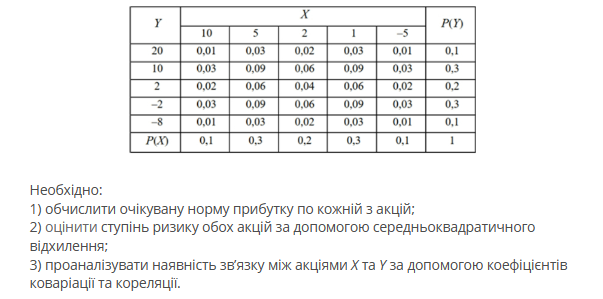

Для обчисленя потрібних показників  використаємо функції з попереднього завдання 

In [157]:
def analytical_indicators(X,P):
    math_exp = 0  # Математичне сподівання
    disp = 0  # Сумма квадратів величин на їх ймовірність
    for i in range(len(X)):
        math_exp += X[i]*P[i]  
        disp += X[i]**2*P[i]
    dispersion = disp - math_exp**2  # Дисперсія
    standard_deviation = dispersion**(1/2) # Стандартне відхилення    
    return math_exp, dispersion, standard_deviation
     

In [158]:
def correlation(X, Y, P, X_ind, Y_ind):
    # Функція розкахунку коефіцієнта коваріації приймає такі аргменти: список випадкових велечин Х та У, їх йомовірності,
    # та змінні X_ind, Y_ind в яких обрахованні математичні сподівання та стандартне відхилення для даних велечин відповідно.
    Mx = X_ind[0] # Мат сподівання для велечин Х
    My = Y_ind[0] # Мат сподівання для велечин Y
    σx = X_ind[2] # Стандартне відхилення  для велечин Х
    σy = Y_ind[2] # Стандартне відхилення для велечин Y
    Mxy = 0    # Мат сподівання для велечин ХY
    for i in range(len(X)):
        for j in range(len(Y)):
            Mxy += X[i]*P[i][j]*Y[j]
    cov_xy = Mxy - Mx * My # коефіцієет коваріації
    r = cov_xy / (σx * σy) # коефіцієет кореляції
    return r, cov_xy, Mxy

##  1)Обчислення норми прибуку по кожній з акція

Оскільки  Р(Х) = Р(У) = Р(ХУ)

Визначемо випадкові величини Х та У , та побудуємо таблицю 

|X|10|2|5|1|-5|
|:-|:-:|:-:|:-:|:-:|-:|
|P(X/Y)|0.1|0.3|0.2|0.3|0.1|
|Y|20|10|2|-2|-8|

In [159]:
X = [10, 5, 2, 1, -5]

In [160]:
Y = [20, 10, 2, -2, -8]

In [161]:
P_xy = [0.1, 0.3, 0.2, 0.3, 0.1]

In [162]:
profit_margin_X = analytical_indicators(X,P_xy)[0] # Оскільки функція вертає список з показниками,
                                                   # то під індексом 0 стоїть Математичне сподівання 
profit_margin_X

2.6999999999999997

In [163]:
profit_margin_Y = analytical_indicators(Y,P_xy)[0]
profit_margin_Y

4.000000000000001

####  Отже на основі даних розрахунків можемо зробити висновок що пакет акцій У є вигіднішим , оскільки очікувана норма прибутків 4, а в пакеті акцій Х дорівнює 2.4

##  2) Оцінка ступеню ризику по двох пакетів акцій

In [164]:
risk_assessment_X = analytical_indicators(X,P_xy)[2] # Оскільки функція вертає список з показниками,
                                                   # то під індексом 2 стоїть Стандартне відхилення
risk_assessment_X    

3.7161808352124095

In [165]:
risk_assessment_Y = analytical_indicators(Y,P_xy)[2]
risk_assessment_Y

7.899367063252599

###  Отже на основі даних розрахунків можемо зробити висновок що пакет акцій __У є ризикованіший__ , оскільки стандартне відхилення   більше на 4,26 %  ніж пакет  акцій Х 

## 3) Оціникти наявність зв'язку між паектом акцій Х та У

Для визначення кореляції визначемо даний масив за домопогою матриці 

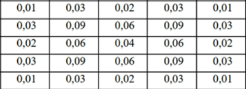

In [166]:
P_XY = [[0.01, 0.03, 0.02, 0.03, 0.01], 
        [0.03, 0.09, 0.06, 0.09, 0.03],
        [0.02, 0.06, 0.04, 0.06, 0.02],
        [0.03, 0.09, 0.06, 0.09, 0.03],
        [0.01, 0.03, 0.02, 0.03, 0.01],
       ]

_Визначаємо основіні показники по пакетах акцій Х та У_

In [167]:
X_ind = analytical_indicators(X,P_xy)
X_ind

(2.6999999999999997, 13.810000000000002, 3.7161808352124095)

In [168]:
Y_ind =analytical_indicators(Y,P_xy)
Y_ind

(4.000000000000001, 62.4, 7.899367063252599)

_Визначаємо коефіцієнт коваріаці та кореляцію по пакетах акцій Х та У_

In [169]:
r = correlation(X, Y, P_XY, X_ind, Y_ind)
print("Кореляція: ",r[0],"\n" , "Коефіцієнт коваріації: ", r[1], "\n","Математичне сподівання для двох подій ", r[2], "\n",)

Кореляція:  0.0 
 Коефіцієнт коваріації:  0.0 
 Математичне сподівання для двох подій  10.8 



__Отже на основі даних розрахунків можемо зробити висновок що,  лінійної кореляції між змінними немає__